In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.io.fits import Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import richardsplot
import os

/Users/trevormccaffrey/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
def make_sameName(i): #remove necessary characters to match image formatting (only to arcsec, remove SDSS) -- elim J as well : 8/23
    
    i = list(i)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(9)
    i.pop(9)
    i.pop(9)
    i.pop(9)

    i = ''.join(i)

    return i

In [3]:
new_plates_wname = pd.read_csv('../SpringFinalFigs_moreParams.csv')

plates = new_plates_wname['PLATE_1']
SDSS = new_plates_wname["name"]
redshift = new_plates_wname["redshift_1"]

Cell below is temporary

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey

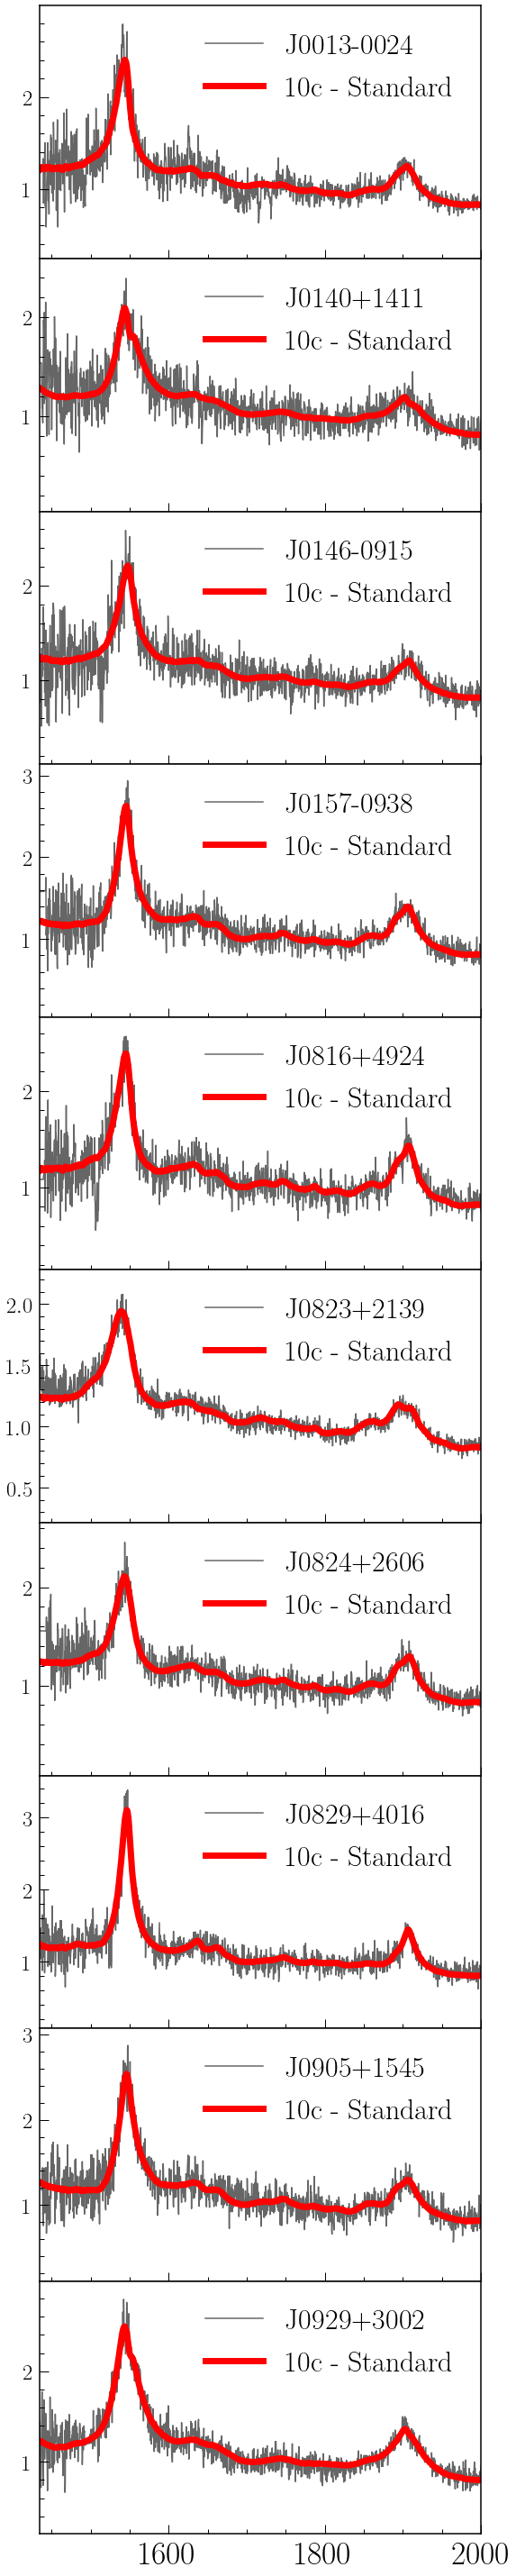

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey

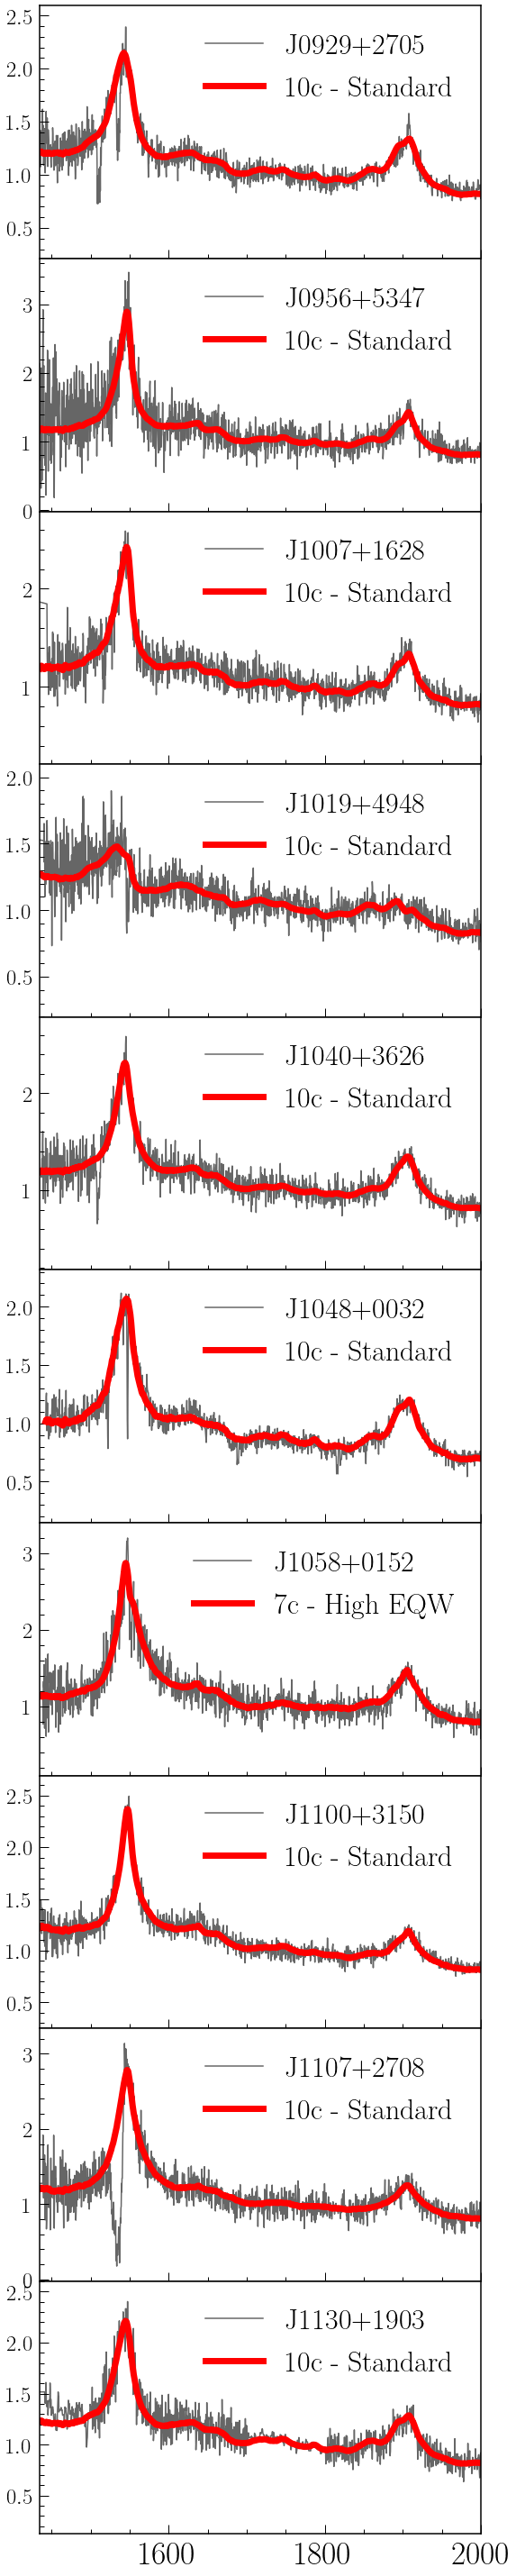

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey

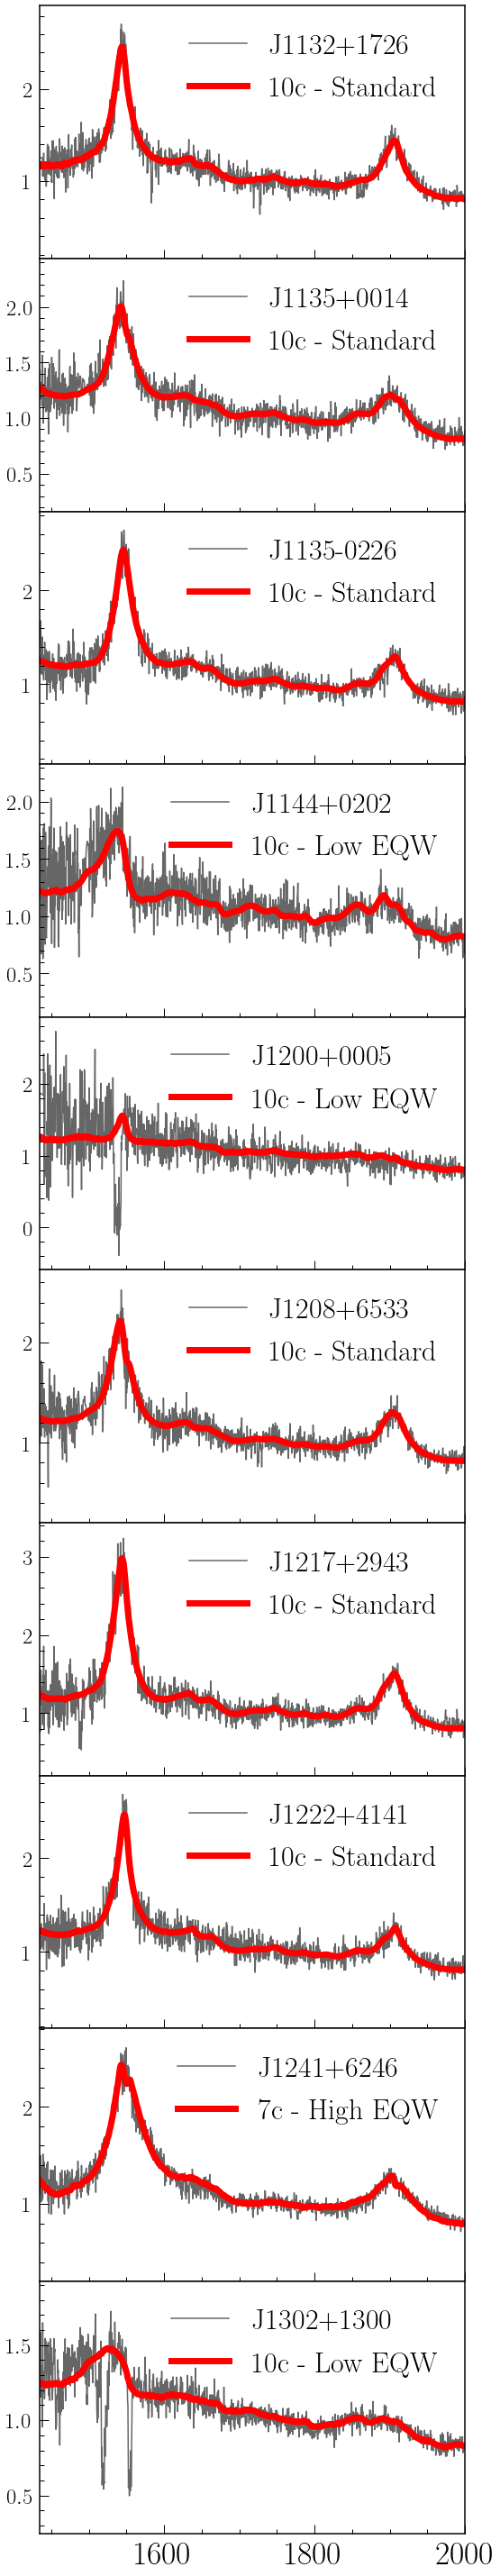

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey

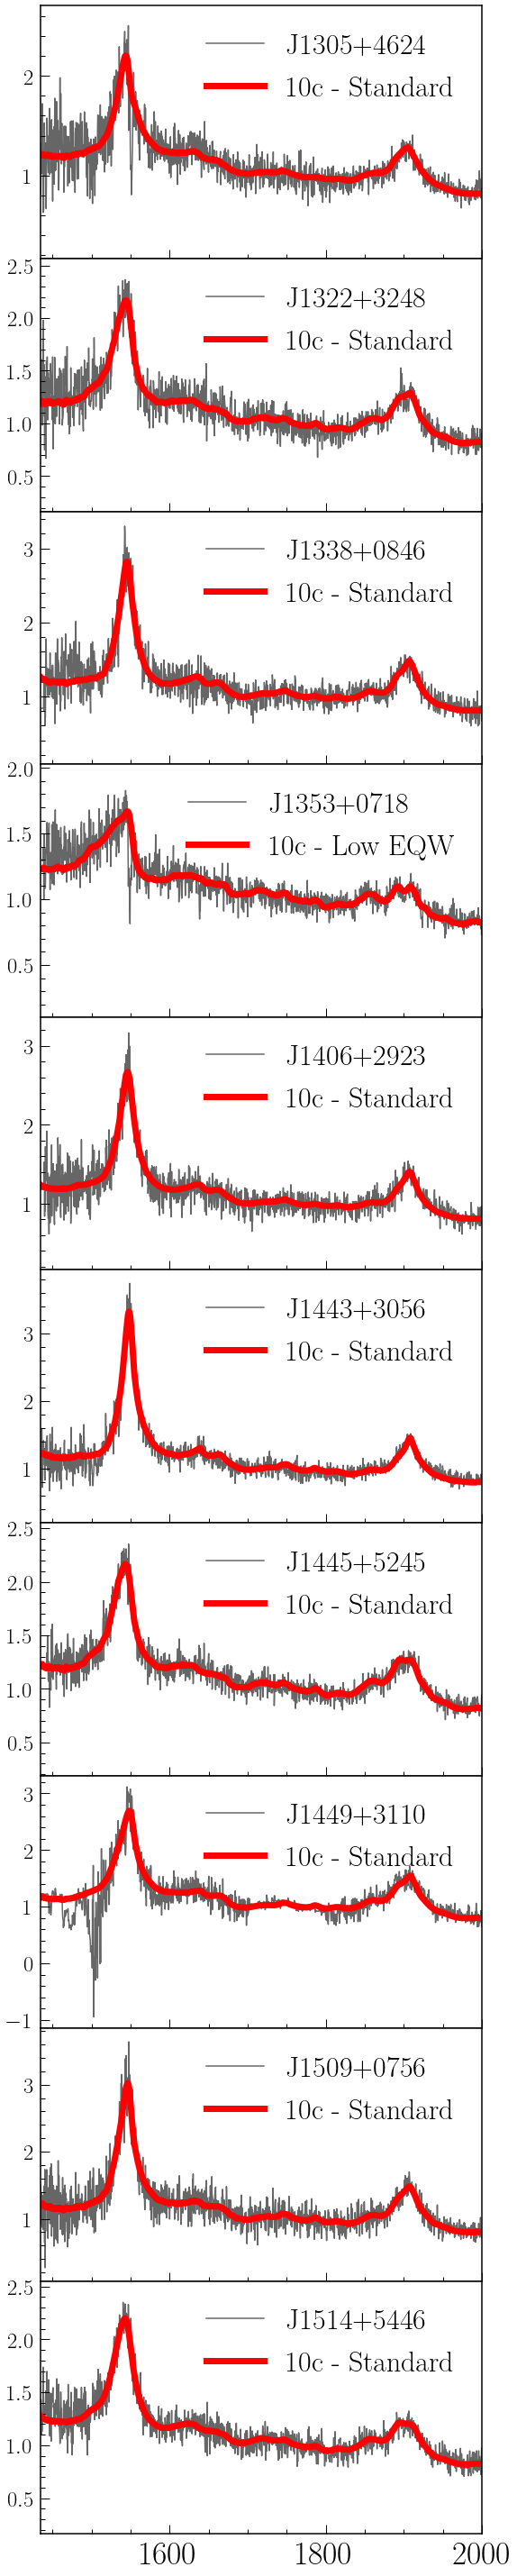

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/trevormccaffrey

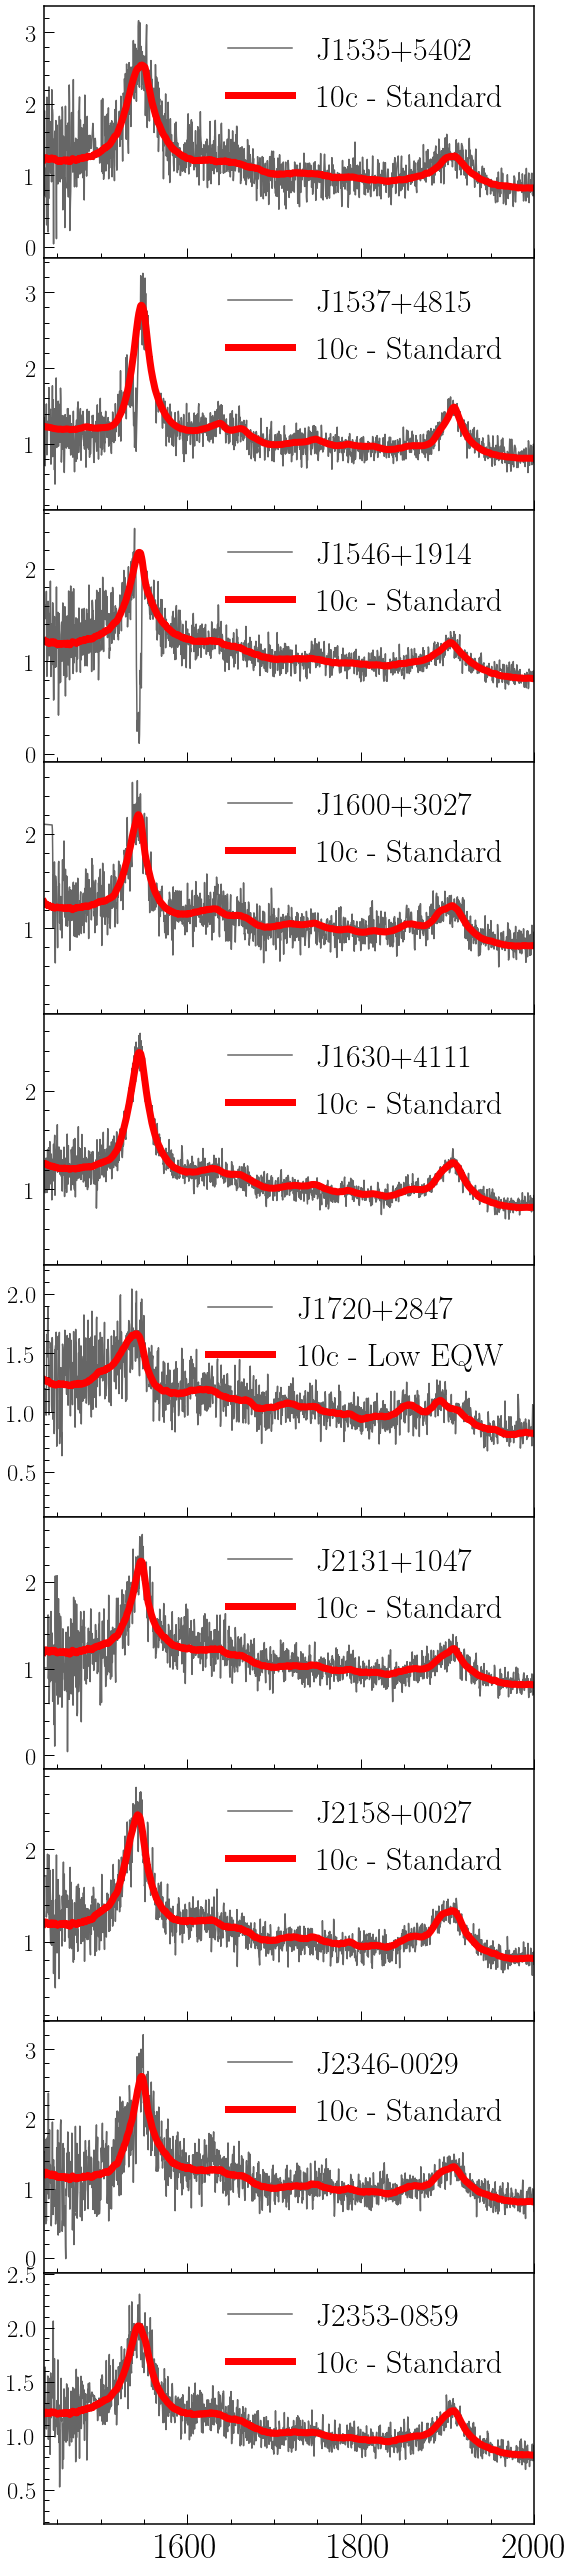

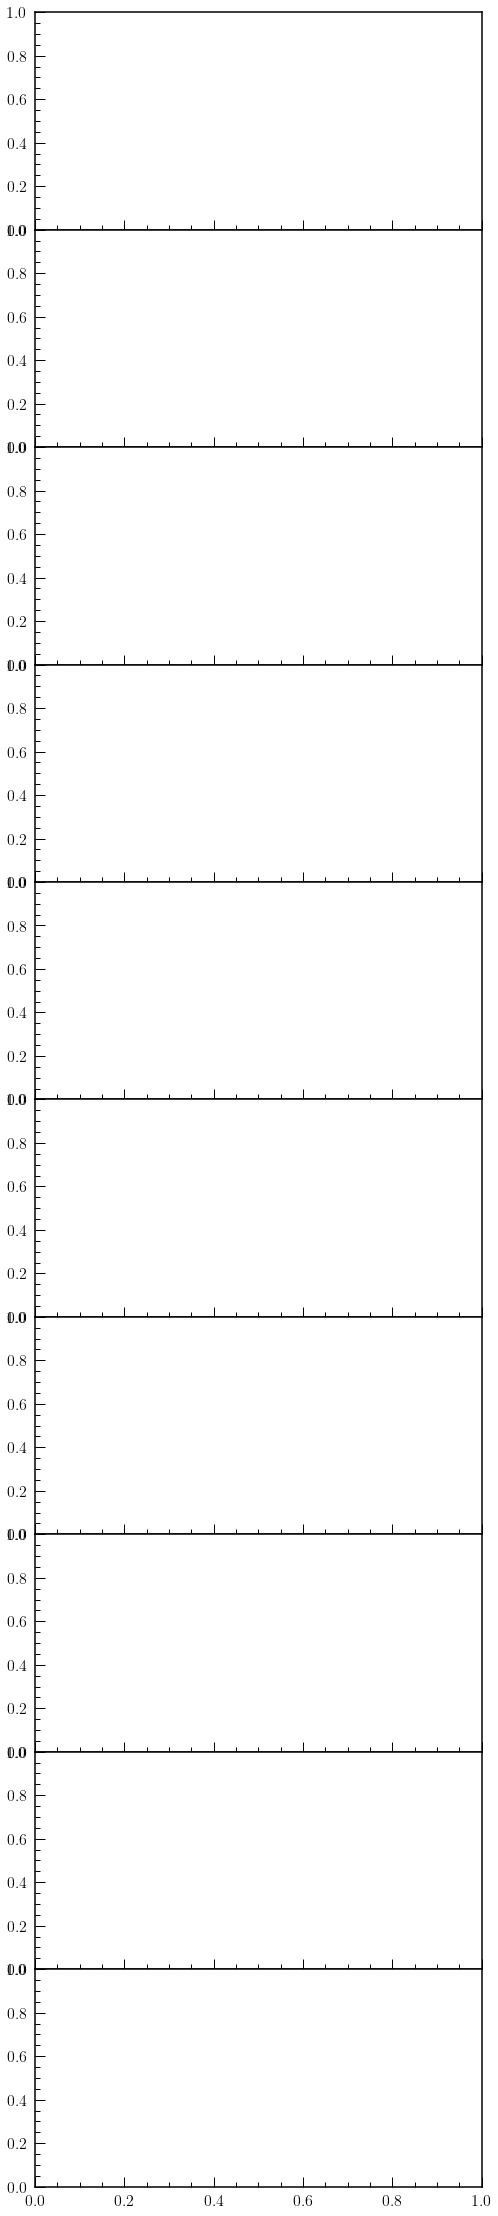

In [10]:
path = 'VLA/'
reconstructions = open(path+'VLA_best.dat')
reconsts = reconstructions.readlines() #names of which reconstruction to use

#Path to raw dr7 spectra
spec_path = '../pull_spectra_SDSSdr7/spectro/1d_26/'
spectra = []
for i in range(len(redshift)): 
    for k in os.listdir(spec_path+str(list(plates)[i])+'/1d'):
        if not k.startswith("."):
            spectra.append(spec_path+str(list(plates)[i])+'/1d/'+k)
        #print(k)

fignum = 1 #for saving subplots
fig, axs = plt.subplots(10, 1, figsize=(8,40), sharex=True)
#axs[9].set_xlabel('Wavelength (Å)')
#axs[4].set_ylabel('$F_{\lambda}$ [Arbitrary Units]')

#eig10c_reg = []
for reconst,spectrum, k in zip(reconsts, spectra, range(len(spectra))):
    
    #Gather data for kth spectrum
    hdul_spec = fits.open(spectrum) #navigate to each fits file and open
    sdss_c0 = hdul_spec[0].header['coeff0']
    sdss_c1 = hdul_spec[0].header['coeff1']
    sdss_npix = hdul_spec[0].header['naxis1'] 
    sdss_loglam = sdss_c0 + sdss_c1*np.arange(sdss_npix)
    sdss_wave = 10.**(sdss_loglam)  #x-axis: wavelength
    sdss_wave /= (1+list(redshift)[k])
    if make_sameName(str(list(SDSS)[k]))=="1048+0032": sdss_wave+=10.5 #ignore bug with this object for plotting
    
    #Now just want the name of the reconstruction file
    reconst = reconst.split('/')
    compname = reconst[-2] + '/' + reconst[-1]
    file = path+compname
    
    #Now gather data for reconstruction file
    hdulist = fits.open(file[:-1])
    eigvals = hdulist[1].data #eigenvalues are stored in the first data extension HDU
    eigvecs = hdulist[0].header['COMPONEN']
    eigvecs = eigvecs.split('/')
    eigvecs = reconst[-2]+'/'+eigvecs[-1]
    eigvecs = pd.read_csv(path+eigvecs, sep='  ')
    eigvecs = np.array(eigvecs)
    
#    if (reconst[5] == 'compfit_12603000_10c_180421_VLA_49_200225'):
#        if (len(eigvals)==10):
#            eig10c_reg.append(eigvals)
#        else:
#            eig10c_reg.append(eigvals[0])
        
#eig10c_reg = np.reshape((np.array(eig10c_reg)), (len(eig10c_reg), 10)) 
#np.savetxt("spring_ICA_weights.csv", eig10c_reg)

    if np.shape(eigvals)[0] == 2:
        eigvecs = np.reshape(eigvecs, (len(eigvecs), np.shape(eigvals)[1]))
        eigfunctions = eigvals[0]*eigvecs
    else:
        eigfunctions = eigvals*eigvecs
        
    wave = hdulist[0].header['WAVE']
    wave = wave.split('/')
    wave = reconst[-2]+'/'+wave[-1]
    wave = pd.read_csv(path+wave)
    wave = np.array(wave)

    wave_mask = (wave>sdss_wave[0])&(wave<3000.)
    wav = wave[wave_mask]
    comp = np.reshape(eigfunctions.sum(axis=1), (len(eigfunctions.sum(axis=1)), 1))
    sdss_flux = hdulist[0].data[0]
    wave_end = min(len(wave[wave_mask]), len(sdss_flux))

    axs[k%10].plot(wav[:wave_end], sdss_flux[:wave_end], 'k', label="J"+make_sameName(str(list(SDSS)[k])), alpha=0.6)
    
    if reconst[5] == 'compfit_12603000_10c_180421_VLA_49_200225':
        axs[k%10].plot(wave[wave_mask], comp[wave_mask], 'r', linewidth=7.0, label="10c - Standard")
        file_tag = '10cReg'
    elif reconst[5] == 'compfit_12653000_hew_hsn_7c_190302_CIVgt60_VLA_49_200225':
        axs[k%10].plot(wave[wave_mask], comp[wave_mask], 'r', linewidth=7.0, label="7c - High EQW")
        file_tag = '7cHEW'
    elif reconst[5] == 'compfit_12753000_lowew_10c_181101_CIVlt30_VLA_49_200225':
        axs[k%10].plot(wave[wave_mask], comp[wave_mask], 'r', linewidth=7.0, label="10c - Low EQW")
        file_tag = '10cLEW'
        
    axs[k%10].legend(loc="upper right", prop={"size":32}, frameon=False)
    axs[k%10].set_xlim([1435, 2000]) #wavelength domain covered by spectra
    axs[k%10].set_ylim([min(sdss_flux[:wave_end])-0.2,max(sdss_flux[:wave_end])+0.2])
    axs[k%10].tick_params(axis='y', which='major', labelsize=24.5)
    axs[k%10].tick_params(axis='x', which='major', labelsize=35.5)
    #axs[k%10].set_xticks([1400,1600,1800,2000])
    #axs[k].set_ylabel('$F_{\lambda}$ [Arbitrary Units]')
    #axs[k].set_xlabel('Wavelength (Å)')  
    #plt.savefig('ICA_Reconstruction_wl1435to2000/{}_{}_1435to2000A.png'.format(list(SDSS)[k], file_tag))
    if (k+1)%10 == 0:
        #fig.text(0.04, 0.5, '$F_{\lambda}$ [Arbitrary Units]', va='center', rotation='vertical', size=45)
        plt.tight_layout()
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.savefig("../PaperPlots/ICAplots_stack{}.pdf".format(str(fignum)))
        plt.show()
        fignum += 1
        if fignum == 5: fig, axs = plt.subplots(10, 1, figsize=(8,36), sharex=True)
        else: fig, axs = plt.subplots(10, 1, figsize=(8,40), sharex=True)
        #axs[-1].set_xlabel('Wavelength (Å)', fontsize=25)
        #axs[4].set_ylabel('$F_{\lambda}$ [Arbitrary Units]')
            
            
            
#plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("../PaperPlots/ICAplots_stack{}.pdf".format(str(fignum)))
plt.show()

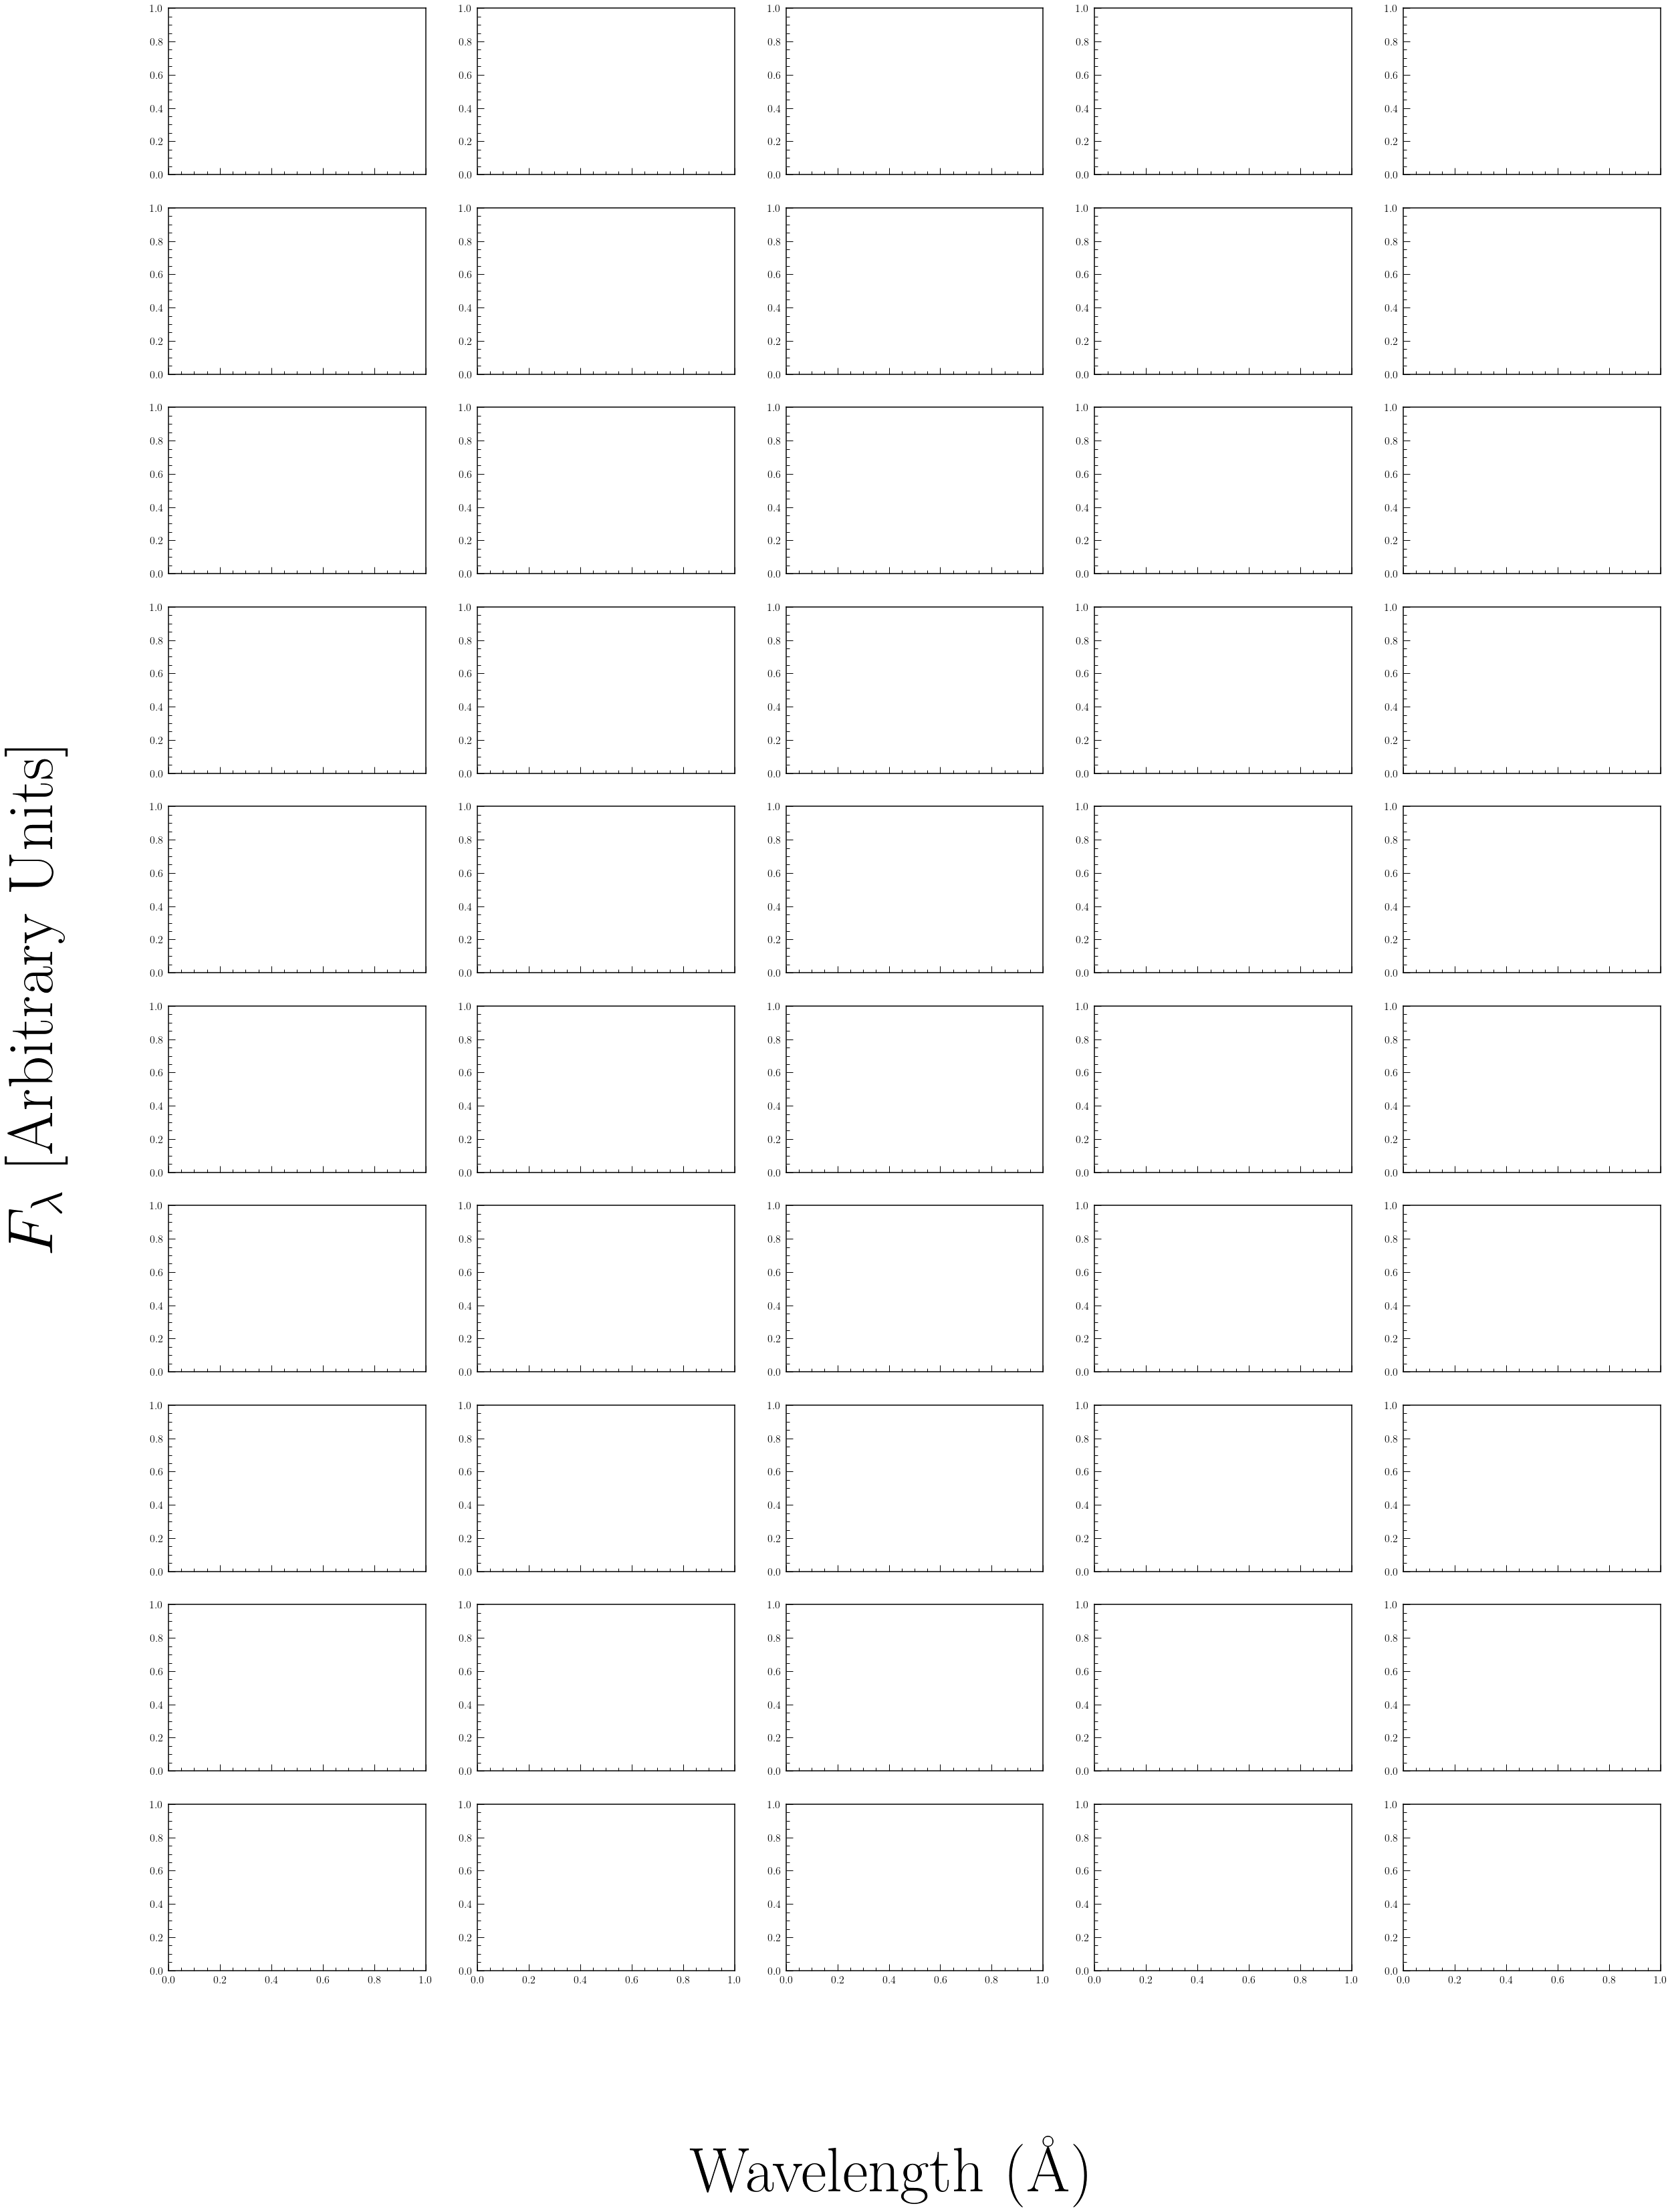

In [8]:
fig, axs = plt.subplots(10, 5, figsize=(40,54), sharex=True)
fig.text(0.04, 0.5, '$F_{\lambda}$ [Arbitrary Units]', va='center', rotation='vertical', size=95)
fig.text(0.5, 0.04, 'Wavelength (Å)', ha='center', size=95)
plt.savefig("../PaperPlots/ICAplots_stacktemplate.pdf")